<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/Hwk3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [86]:
auto = pd.read_csv('/content/sample_data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**1(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median and a 0 if mpg contains a value below its medi**an

In [87]:
mpg_med = auto.mpg.median()
auto['mpg01'] = np.where(auto.mpg > mpg_med, 1, 0)

In [88]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [89]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,mpg01
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.837419
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.736711
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.736608
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.745046
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.316618
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.448150
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.512200
mpg01,0.837419,-0.736711,-0.736608,-0.745046,0.316618,0.448150,0.512200,1.000000


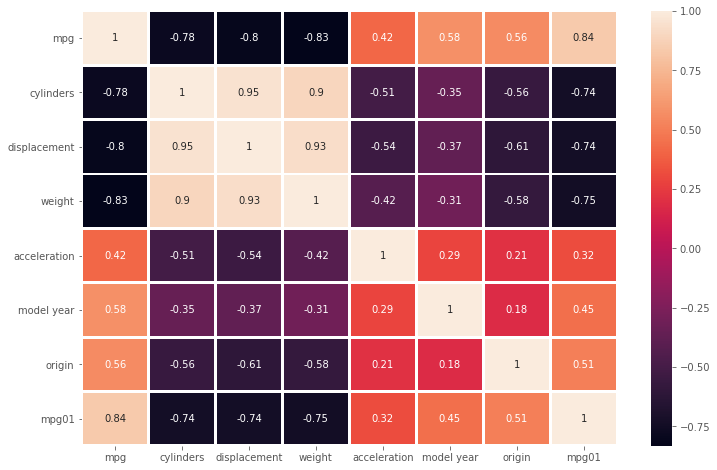

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(auto.corr(), annot=True, fmt='.2g', linewidths=2)

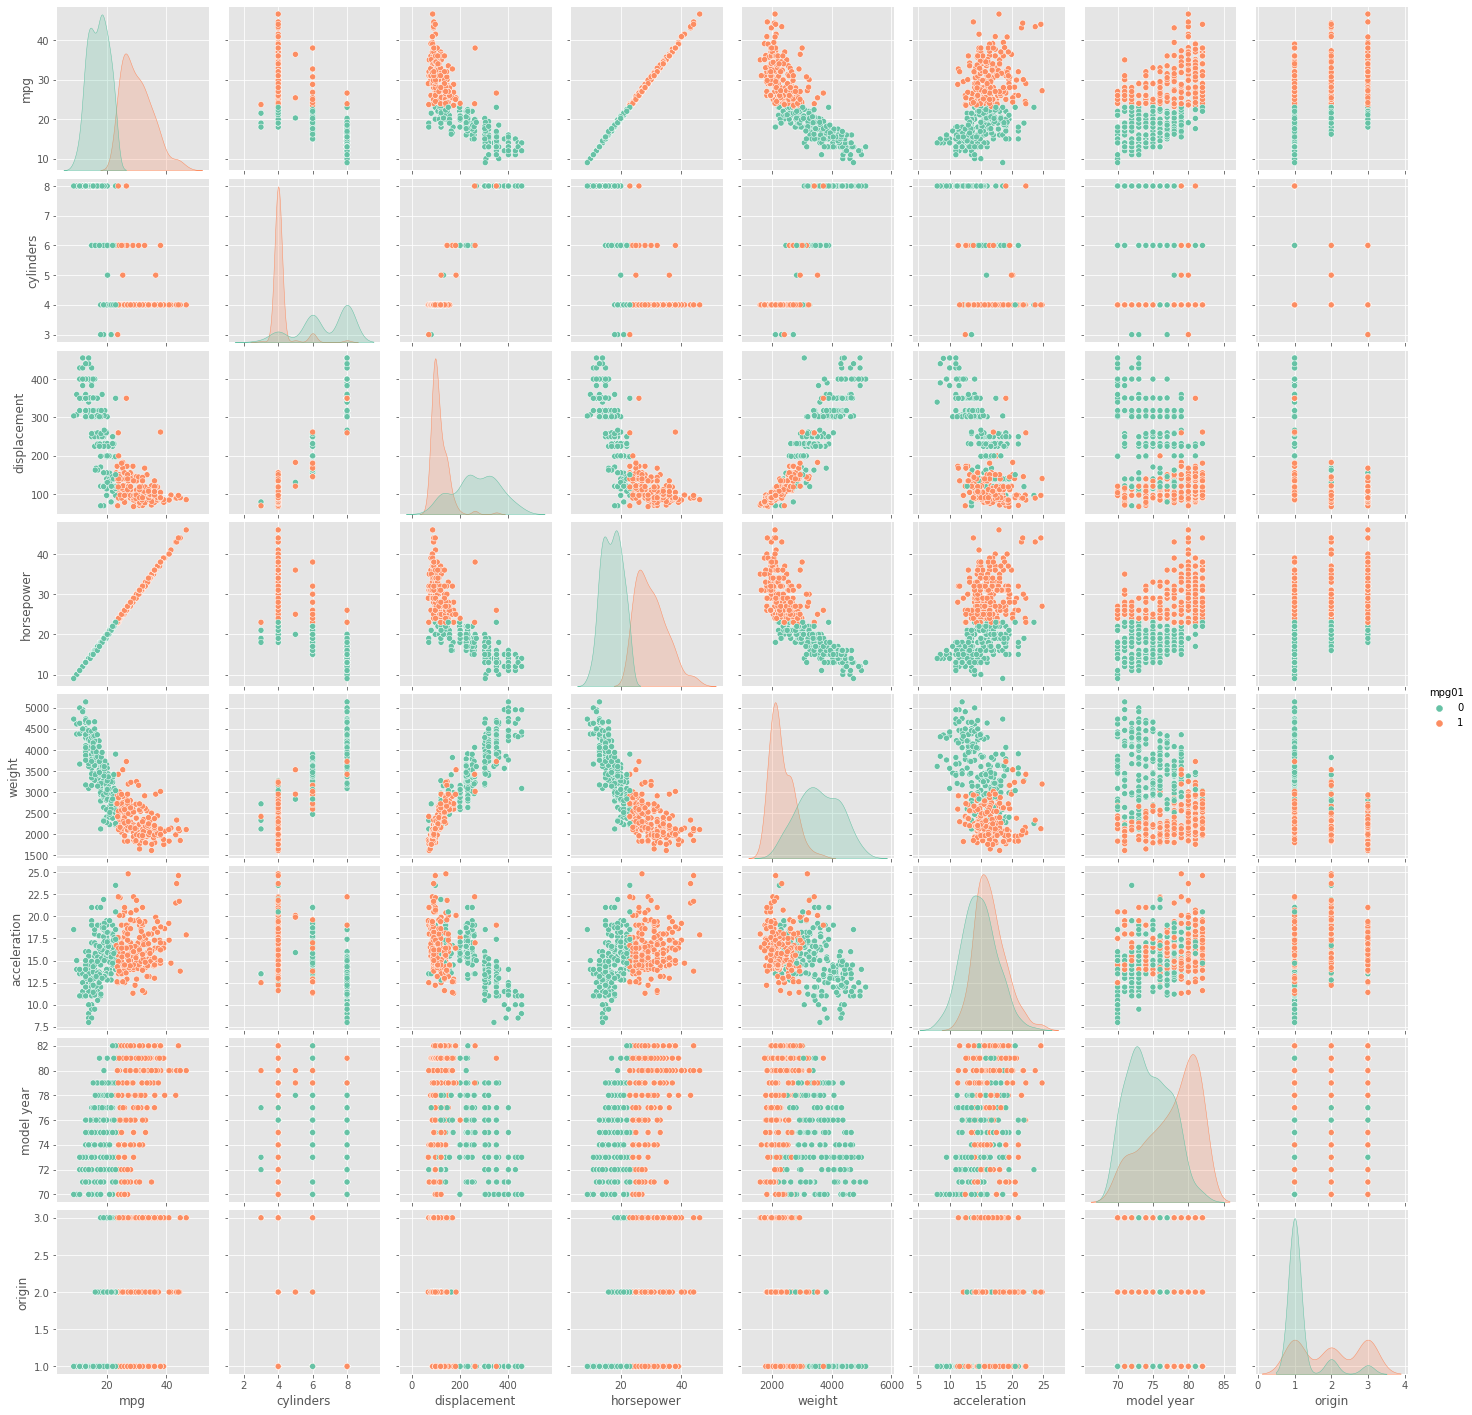

In [ ]:
sns.pairplot(auto, hue='mpg01', palette='Set2')

In [92]:
auto['horsepower'] = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype('int64')

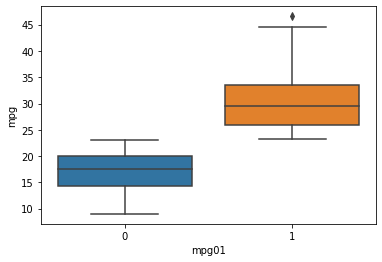

In [ ]:
sns.boxplot(data=auto, y='mpg', x='mpg01', orient='v')

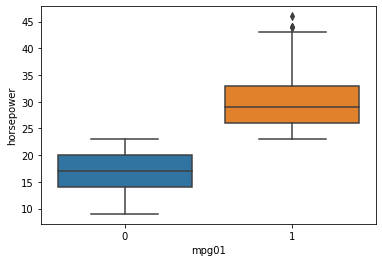

In [ ]:
sns.boxplot(data=auto, x='mpg01', y='horsepower')

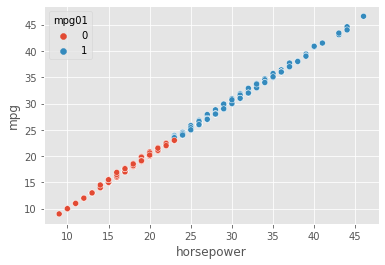

In [ ]:
sns.scatterplot(data=auto, y='mpg', x='horsepower', hue='mpg01')

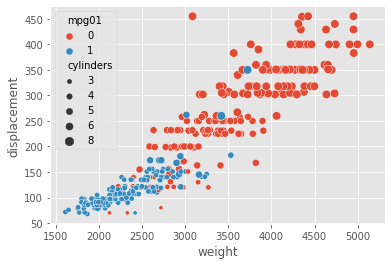

In [ ]:
sns.scatterplot(data=auto, x='weight', y='displacement', hue='mpg01', size='cylinders')

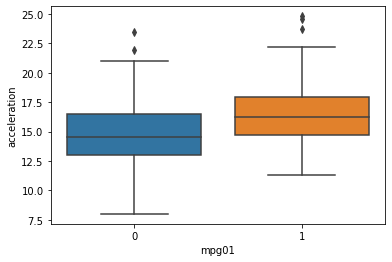

In [ ]:
sns.boxplot(data=auto, x='mpg01', y='acceleration')

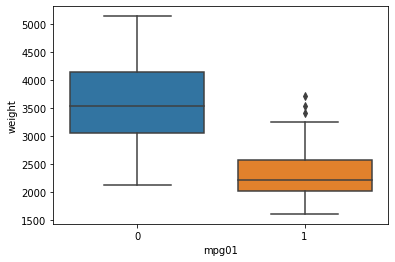

In [ ]:
sns.boxplot(data=auto, x='mpg01', y='weight')

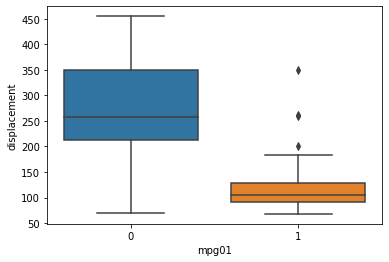

In [ ]:
sns.boxplot(data=auto, x='mpg01', y='displacement')

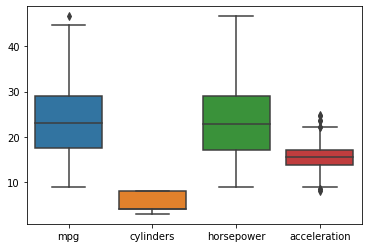

In [ ]:
sns.boxplot(data=auto[['mpg', 'cylinders','horsepower', 'acceleration' ]], orient='v')

The pairplot and correlation plots shows a positive correlation between mpg and horsepower. It means as horsepower increases, mpg also increases. The boxplot also confirms the same.

There is a negative correlation between mpg and weight as well as mpg and displacement. As the weight and displacement of the car increases, the mpg decreases. By splitting the data by mpg01, you can see these relationships. 

There is a positive correlation between weight and displacement as well. This explains why both weight and discplacement are similarly correlated with mpg.


**Data Processing **

**1(c) Split the dat into a training set and test set**

In [94]:
X = auto.drop(['mpg01', 'car name', 'origin', 'model year', 'mpg', 'cylinders' ], axis=1)
y = auto['mpg01']

In [95]:
X.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 4)
(80, 4)
(318,)
(80,)


**Transform data using StandardScalar()**

In [97]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**1(d) Perform a logistic regression on the training data in order to predict mpg01 using variables that seemed most associated with mpg01. Calculate the test error.**

In [98]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)

In [99]:
y_pred = lr.predict(X_test)

In [100]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [101]:
y_test

65     0
132    1
74     0
78     0
37     0
      ..
269    1
235    1
145    1
196    1
124    0
Name: mpg01, Length: 80, dtype: int64

In [102]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the logistic regression model is: ', accuracy)

The accuracy of the logistic regression model is:  0.95


In [103]:
mse = mean_squared_error(y_test, y_pred)
mse

0.05

In [104]:
error = np.sqrt(mse)

print('The error of the logistic regression model is:', error)

The error of the logistic regression model is: 0.22360679774997896


In [105]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  3],
       [ 1, 36]])

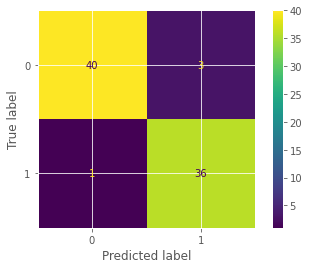

In [106]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(lr_fit, X_test, y_test)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.92      0.97      0.95        37

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [113]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score

In [128]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9676075268817204


In [129]:
# define grid
grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [1, 5, 10], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'multi_class': ['auto', 'ovr', 'multinomial'] }

# define search
search = GridSearchCV(lr, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
lr_results = search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % lr_results.best_score_)
print('The best parameters of the model: %s' % lr_results.best_params_)

Mean Accuracy: 0.979
The best parameters of the model: {'C': 1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


### Get the best parameters of the LR model

In [130]:
print('The best estimator of the model: ', lr_results.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', lr_results.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', lr_results.best_params_)
print()
print('-'*100)
print('The best score of the model: ', lr_results.best_score_)



The best estimator of the model:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

----------------------------------------------------------------------------------------------------
The best index of the model:  2

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'C': 1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9790658602150537


### Fit the LDA Model

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [132]:
lda = LDA()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

In [133]:
lda_error = np.sqrt(mean_squared_error(y_test, lda_pred))
print('The error of the LDA model is: ', lda_error)

The error of the LDA model is:  0.0


### Evaluate Model with stratified k-fold cross-validation

In [134]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9602822580645162


### Tune the model with GridSearchCV()

In [135]:
# define grid
grid = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': np.arange(0, 1, 0.01), 'n_components': [0, 1, 2] }

# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
lda_results = search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % lda_results.best_score_)
print('The best parameters of the model: %s' % lda_results.best_params_)

Mean Accuracy: 0.960
The best parameters of the model: {'n_components': 0, 'shrinkage': 0.0, 'solver': 'lsqr'}


### Get the best parameters of the LDA model

In [136]:
print('The best estimator of the model: ', lda_results.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', lda_results.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', lda_results.best_params_)
print()
print('-'*100)
print('The best score of the model: ', lda_results.best_score_)



The best estimator of the model:  LinearDiscriminantAnalysis(n_components=0, priors=None, shrinkage=0.0,
                           solver='lsqr', store_covariance=False, tol=0.0001)

----------------------------------------------------------------------------------------------------
The best index of the model:  1

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'n_components': 0, 'shrinkage': 0.0, 'solver': 'lsqr'}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9602822580645162


### Fit the QDA Model

In [138]:
qda = QDA()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

In [139]:
qda_error = np.sqrt(mean_squared_error(y_test, qda_pred))
print('The error of the QDA model is: ', qda_error)

The error of the QDA model is:  0.19364916731037085


### Evaluate Model with stratified k-fold cross-validation

In [140]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(qda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9518481182795698


### Tune the model with GridSearchCV()

In [141]:
grid = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# define search
qda_search = GridSearchCV(qda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
qda_results = qda_search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % qda_results.best_score_)
print('The best parameters of the model: %s' % qda_results.best_params_)

Mean Accuracy: 0.954
The best parameters of the model: {'reg_param': 0.01, 'store_covariance': True, 'tol': 0.0001}


### Get the best parameters of the QDA model

In [142]:
print('The best estimator of the model: ', qda_results.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', qda_results.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', qda_results.best_params_)
print()
print('-'*100)
print('The best score of the model: ', qda_results.best_score_)



The best estimator of the model:  QuadraticDiscriminantAnalysis(priors=None, reg_param=0.01,
                              store_covariance=True, tol=0.0001)

----------------------------------------------------------------------------------------------------
The best index of the model:  24

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'reg_param': 0.01, 'store_covariance': True, 'tol': 0.0001}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9539314516129032


### Summary of the LDA and QDA Models

In [143]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('LINEAR DISCRIMINANT ANALYSIS')
print('Accuracy Score - LDA:', metrics.accuracy_score(y_test, lda_pred))  
print('Average Precision - LDA:', metrics.average_precision_score(y_test, lda_pred)) 
print('F1 Score - LDA:', metrics.f1_score(y_test, lda_pred)) 
print('Precision - LDA:', metrics.precision_score(y_test, lda_pred)) 
print('Recall - LDA:', metrics.recall_score(y_test, lda_pred))
print('ROC Score - LDA:', roc_auc_score(y_test, lda_pred))

#Create classification report
class_report_RF=classification_report(y_test, lda_pred)
print(class_report_RF)
print('')
print('')
print('-'*100)
print('QUADRATIC DISCRIMINANT ANALYSIS')
print('Accuracy Score - QDA:', metrics.accuracy_score(y_test, qda_pred))  
print('Average Precision - QDA:', metrics.average_precision_score(y_test, qda_pred)) 
print('F1 Score - QDA:', metrics.f1_score(y_test, qda_pred)) 
print('Precision - QDA:', metrics.precision_score(y_test, qda_pred)) 
print('Recall - QDA:', metrics.recall_score(y_test, qda_pred))
print('ROC Score - QDA:', roc_auc_score(y_test, qda_pred))
class_report_RFq=classification_report(y_test, qda_pred)
print(class_report_RFq)

LINEAR DISCRIMINANT ANALYSIS
Accuracy Score - LDA: 1.0
Average Precision - LDA: 1.0
F1 Score - LDA: 1.0
Precision - LDA: 1.0
Recall - LDA: 1.0
ROC Score - LDA: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



----------------------------------------------------------------------------------------------------
QUADRATIC DISCRIMINANT ANALYSIS
Accuracy Score - QDA: 0.9625
Average Precision - QDA: 0.925
F1 Score - QDA: 0.961038961038961
Precision - QDA: 0.925
Recall - QDA: 1.0
ROC Score - QDA: 0.9651162790697674
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.93      1.00      0.96        37

    accuracy                           

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print("  Model\t\t RMSE \t\t R2") 
print('-'*36)
print("""LR  Model\t {:.5f} \t{:.5f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred))) 
print("""LDA Model\t {:.5f} \t{:.5f}""".format( np.sqrt(mean_squared_error(y_test, lda_pred)), r2_score(y_test, lda_pred))) 
print("""QDA Model\t {:.5f} \t{:.5f}""".format( np.sqrt(mean_squared_error(y_test, qda_pred)), r2_score(y_test, qda_pred)))

  Model		 RMSE 		 R2
------------------------------------
LR  Model	 0.22361 	0.79887
LDA Model	 0.00000 	1.00000
QDA Model	 0.19365 	0.84915


In [146]:
model_summary = pd.DataFrame({'Model': ['Logistic Regression', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis'],
              'Best Score': [lr_results.best_score_, lda_results.best_score_, qda_results.best_score_],
              'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_test, lda_pred)), np.sqrt(mean_squared_error(y_test, qda_pred))],
              'R Squared': [r2_score(y_test, y_pred), r2_score(y_test, lda_pred), r2_score(y_test, qda_pred)],
              'Best Parameter': [lr_results.best_params_, lda_results.best_params_,qda_results.best_params_],
              })   

model_summary

,Model,Best Score,RMSE,R Squared,Best Parameter
0,Logistic Regression,0.979066,0.223607,0.798869,"{'C': 1, 'multi_class': 'auto', 'penalty': 'l1..."
1,Linear Discriminant Analysis,0.960282,0.000000,1.000000,"{'n_components': 0, 'shrinkage': 0.0, 'solver'..."
2,Quadratic Discriminant Analysis,0.953931,0.193649,0.849151,"{'reg_param': 0.01, 'store_covariance': True, ..."


## 2. Using the Concrete data set https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength data set you will use a regression model to predict the strength. 


In [ ]:
mpg_med = auto.mpg.median()
auto['mpg01'] = np.where(auto.mpg > mpg_med, 1, 0)

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [53]:
df = pd.read_csv('/content/sample_data/concrete_data.csv')

In [54]:
col_names = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]
df.columns = col_names

In [55]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## (a) Scale the ”condition” variables using a logarithmic scale.

In [56]:
df[['coarseagg', 'fineagg', 'age', 'strength']] = np.log(df[['coarseagg', 'fineagg', 'age', 'strength']])

In [57]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,6.946976,6.516193,3.332205,4.381902
1,540.0,0.0,0.0,162.0,2.5,6.961296,6.516193,3.332205,4.125359
2,332.5,142.5,0.0,228.0,0.0,6.837333,6.386879,5.598422,3.695607
3,332.5,142.5,0.0,228.0,0.0,6.837333,6.386879,5.899897,3.714791
4,198.6,132.4,0.0,192.0,0.0,6.885919,6.715989,5.886104,3.790985


In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## (b) Use the snippet provided of the forward selection to reduce the number of covariates

In [59]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
    The original version of this script is due to ajshumaher.
    I hacked it to get it closer to class materials. It is not perfect though

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    models = {}
    null_candidate = "1"
    # the number one refers to the intercept in the model
    # We don't need to calculate the regression since in this case our estimate is the average of the response variable
    # that is, \hat{Y}= (mean(Y),\ldots,mean(Y))
    # In this case the R^2 =0
    models[null_candidate] = 0.0
    tmp_remaining = remaining
    key_variables = [null_candidate]
    for i in range(0, len(remaining)):
        candidate_and_scores = {}
        key_formula = []
        for candidate in tmp_remaining:
            key_formula = "+".join(key_variables + [candidate])
            formula = "{} ~ {} ".format(response, key_formula)
            score = smf.ols(formula, data).fit().rsquared
            candidate_and_scores[candidate] = score
        max_candidate = max(candidate_and_scores, key=candidate_and_scores.get)
        key_variables.append(max_candidate)
        models[",".join(str(x) for x in key_variables)] = candidate_and_scores[max_candidate]
        tmp_remaining.remove(max_candidate)
    models.pop("1")  # I'll remove the first one since R^2 (adjusted or not will be zero)
    models_adj = {}
    for variables, scores in models.items():
        my_formula = variables.replace(",", "+")
        formula = "{} ~ {} ".format(response, my_formula)
        score = smf.ols(formula, data).fit().rsquared_adj
        models_adj[variables] = score
    # max_candidate = max(models_adj, key=models_adj.get)

    return models_adj

In [60]:
forward_selected(df, 'strength')


{'1,age': 0.3535677738702355,
 '1,age,cement': 0.5714376172767739,
 '1,age,cement,superplastic': 0.6773321873962539,
 '1,age,cement,superplastic,slag': 0.7272097080399225,
 '1,age,cement,superplastic,slag,ash': 0.7566248126042461,
 '1,age,cement,superplastic,slag,ash,water': 0.7919981399148576,
 '1,age,cement,superplastic,slag,ash,water,coarseagg': 0.7924543620366364,
 '1,age,cement,superplastic,slag,ash,water,coarseagg,fineagg': 0.7968617560936715}

## (c) Produce a python program that calculates the best subset selection.

In [61]:
import itertools
import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

In [62]:
def fit_linear_reg(X,y):
    #Fit linear regression model and return RSS and R squared values
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(X,y)
    RSS = mean_squared_error(y,model.predict(X)) * len(y)
    R_squared = model.score(X,y)
    return RSS, R_squared

In [75]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
y = df.strength
X = df.drop(columns = 'strength', axis = 1)
k = 8
RSS_list, R_squared_list, feature_list = [], [], []
numb_features = []

#Looping over k = 1 to k = 8 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 7 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df_r = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})
df_r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if sys.path[0] == '':


,numb_features,RSS,R_squared,features
0,1,244.818640,0.217137,"(cement,)"
1,1,309.750522,0.009502,"(slag,)"
2,1,311.850286,0.002788,"(ash,)"
3,1,294.321506,0.058840,"(water,)"
4,1,276.257004,0.116605,"(superplastic,)"
...,...,...,...,...
250,7,63.454184,0.797091,"(cement, slag, ash, superplastic, coarseagg, f..."
251,7,72.374769,0.768565,"(cement, slag, water, superplastic, coarseagg,..."
252,7,77.809049,0.751188,"(cement, ash, water, superplastic, coarseagg, ..."
253,7,92.262550,0.704969,"(slag, ash, water, superplastic, coarseagg, fi..."


In [64]:
df_min = df_r[df_r.groupby('numb_features')['RSS'].transform(min) == df_r['RSS']]
df_max = df_r[df_r.groupby('numb_features')['R_squared'].transform(max) == df_r['R_squared']]
display(df_min.head(3))
print()
print()
display(df_max.head(3))

,numb_features,RSS,R_squared,features
7,1,201.957159,0.354196,"(age,)"
14,2,133.760422,0.572271,"(cement, age)"
53,3,100.611157,0.678273,"(cement, superplastic, age)"


,numb_features,RSS,R_squared,features
7,1,201.957159,0.354196,"(age,)"
14,2,133.760422,0.572271,"(cement, age)"
53,3,100.611157,0.678273,"(cement, superplastic, age)"


In [65]:
df_r['min_RSS'] = df_r.groupby('numb_features')['RSS'].transform(min)
df_r['max_R_squared'] = df_r.groupby('numb_features')['R_squared'].transform(max)
df_r.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,244.818640,0.217137,"(cement,)",201.957159,0.354196
1,1,309.750522,0.009502,"(slag,)",201.957159,0.354196
2,1,311.850286,0.002788,"(ash,)",201.957159,0.354196
3,1,294.321506,0.058840,"(water,)",201.957159,0.354196
4,1,276.257004,0.116605,"(superplastic,)",201.957159,0.354196


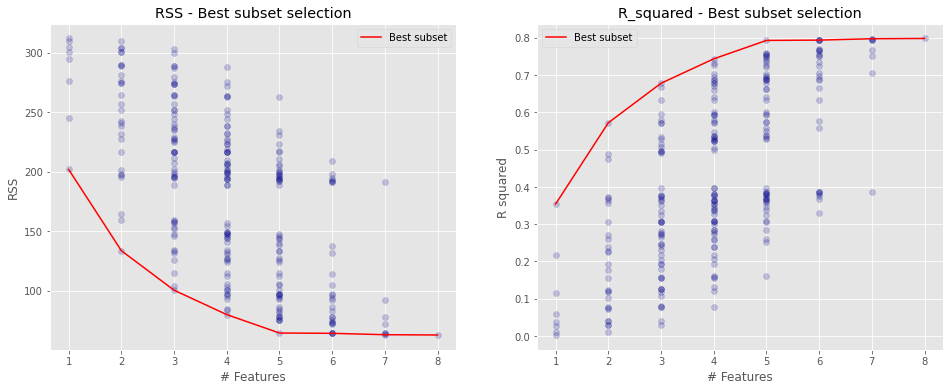

In [66]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df_r.numb_features,df_r.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df_r.numb_features,df_r.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df_r.numb_features,df_r.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df_r.numb_features,df_r.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [67]:
df1 = pd.concat([pd.DataFrame({'features':feature_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [68]:
#Initializing useful variables
m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
0,"(cement,)",244.818640,0.217137,0,0.237688,3.838791,3.838791,0.217137
1,"(slag,)",309.750522,0.009502,1,0.300849,4.858874,4.863667,0.008539
2,"(ash,)",311.850286,0.002788,2,0.303008,4.893740,4.903327,0.000846
3,"(water,)",294.321506,0.058840,3,0.286110,4.620828,4.635209,0.056088
4,"(superplastic,)",276.257004,0.116605,4,0.268692,4.339516,4.358690,0.113158
...,...,...,...,...,...,...,...,...
250,"(cement, slag, ash, superplastic, coarseagg, f...",63.454184,0.797091,250,0.091663,1.480407,2.678785,0.731972
251,"(cement, slag, water, superplastic, coarseagg,...",72.374769,0.768565,251,0.100444,1.622225,2.825396,0.693899
252,"(cement, ash, water, superplastic, coarseagg, ...",77.809049,0.751188,252,0.105840,1.709377,2.917342,0.670492
253,"(slag, ash, water, superplastic, coarseagg, fi...",92.262550,0.704969,253,0.119993,1.937952,3.150710,0.608780


In [69]:
fs_rsquared = forward_selected(df, 'strength').popitem()[-1]
fs_rsquared

0.7968617560936715

## (d) Compare the best subset selection with the one obtained by the forward selection.

In [70]:
print('The maximum R^2 of the feature selection is: ', df1.R_squared.max())
print('the maximum R^2 of the forward selection is: ', fs_rsquared)

The maximum R^2 of the feature selection is:  0.798441062168745
the maximum R^2 of the forward selection is:  0.7968617560936715


In [71]:
features = df1.features.iloc[-1]


In [72]:
fs_features = max(forward_selected(df, 'strength'))
fs_features = fs_features[2:]
fs_features

'age,cement,superplastic,slag,ash,water,coarseagg,fineagg'

In [73]:
print('The important features for the forward selection model: ', fs_features)
print('The important features for the other model: ', features)

The important features for the forward selection model:  age,cement,superplastic,slag,ash,water,coarseagg,fineagg
The important features for the other model:  ('cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age')


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print("  Model\t\t\t\t R2 \t\t Features") 
print('-'*100)
print("""Forward Selection Model\t\t {:.5f} \t{}""".format(fs_rsquared, fs_features))
print("""Manual  Selection Model\t\t {:.5f} \t{}""".format(df1.R_squared.max(), features))


  Model				 R2 		 Features
----------------------------------------------------------------------------------------------------
Forward Selection Model		 0.79686 	age,cement,superplastic,slag,ash,water,coarseagg,fineagg
Manual  Selection Model		 0.79844 	('cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age')


In [83]:
pd.DataFrame({'Model': ['Forward Selection', 'Manual Selection'],
              'R Squared': [fs_rsquared, df1.R_squared.max()],
              'Features': [fs_features, features]})

,Model,R Squared,Features
0,Forward Selection,0.796862,"age,cement,superplastic,slag,ash,water,coarsea..."
1,Manual Selection,0.798441,"(cement, slag, ash, water, superplastic, coars..."
